In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import os
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, bartlett, levene, fligner
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy import stats
from scipy.stats import f_oneway, bartlett, levene, fligner
from sympy import symbols, latex
from sympy.abc import chi
import seaborn as sns
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import chi2
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import fisher_exact
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
zip_path = '/content/drive/My Drive/Colab Notebooks/prak/archive.zip'
extract_path = '/content/extracted/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Файлы извлечены в:", extract_path)

Файлы извлечены в: /content/extracted/


In [ ]:
csv_file = os.path.join(extract_path, 'train.csv')
df = pd.read_csv(csv_file)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


#1. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99)

#a. Критерий Стьюдента

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestIndPower

def t_test_2_samples(sample1, sample2, alternative='two-sided'):
    t_stat, p_value = stats.ttest_ind(sample1, sample2, alternative=alternative)
    return t_stat, p_value

def power_analysis(effect_size, n, alpha=0.05):
    analysis = TTestIndPower()
    power = analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha)
    return power

def sample_size_for_power(power, effect_size, alpha=0.05):
    analysis = TTestIndPower()
    sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
    return sample_size

n1 = 30
n2 = 30
mean1 = 50
mean2 = 51
std1 = 10
std2 = 12

effect_size = (mean1 - mean2) / np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
alpha_values = [0.1, 0.05, 0.01]

results = []

for alpha in alpha_values:
    print(f"\nДоверительный уровень: {1 - alpha:.2f}")

    np.random.seed(42)
    sample1 = np.random.normal(loc=mean1, scale=std1, size=n1)
    sample2 = np.random.normal(loc=mean2, scale=std2, size=n2)

    t_stat, p_value = t_test_2_samples(sample1, sample2, alternative='two-sided')
    reject_null = p_value < alpha
    print(f"Двусторонний тест: t-статистика = {t_stat:.4f}, p-значение = {p_value:.4f}, отклонение H0 = {reject_null}")

    power = power_analysis(effect_size, n1, alpha=alpha)
    print(f"Мощность теста при alpha = {alpha}: {power:.4f}")


    t_stat_greater, p_value_greater = t_test_2_samples(sample1, sample2, alternative='greater')
    reject_null_greater = p_value_greater < alpha
    print(f"Односторонний тест (большее среднее): t-статистика = {t_stat_greater:.4f}, p-значение = {p_value_greater:.4f}, отклонение H0 = {reject_null_greater}")

    t_stat_less, p_value_less = t_test_2_samples(sample1, sample2, alternative='less')
    reject_null_less = p_value_less < alpha
    print(f"Односторонний тест (меньшее среднее): t-статистика = {t_stat_less:.4f}, p-значение = {p_value_less:.4f}, отклонение H0 = {reject_null_less}")



desired_power = 0.8
sample_size_needed = sample_size_for_power(desired_power, effect_size, alpha=0.05)
print(f"\nДля достижения мощности {desired_power * 100:.0f}% необходим размер выборки: {int(np.ceil(sample_size_needed))} для каждой группы")




Доверительный уровень: 0.90
Двусторонний тест: t-статистика = -0.5450, p-значение = 0.5879, отклонение H0 = False
Мощность теста при alpha = 0.1: 0.1203
Односторонний тест (большее среднее): t-статистика = -0.5450, p-значение = 0.7061, отклонение H0 = False
Односторонний тест (меньшее среднее): t-статистика = -0.5450, p-значение = 0.2939, отклонение H0 = False

Доверительный уровень: 0.95
Двусторонний тест: t-статистика = -0.5450, p-значение = 0.5879, отклонение H0 = False
Мощность теста при alpha = 0.05: 0.0637
Односторонний тест (большее среднее): t-статистика = -0.5450, p-значение = 0.7061, отклонение H0 = False
Односторонний тест (меньшее среднее): t-статистика = -0.5450, p-значение = 0.2939, отклонение H0 = False

Доверительный уровень: 0.99
Двусторонний тест: t-статистика = -0.5450, p-значение = 0.5879, отклонение H0 = False
Мощность теста при alpha = 0.01: 0.0145
Односторонний тест (большее среднее): t-статистика = -0.5450, p-значение = 0.7061, отклонение H0 = False
Односторонн

#b.Критерий Уилкоксона-Манна-Уитни (ранговые)

    проверяет гипотезу о равенстве распределений двух независимых выборок, без предположений о нормальности данных

In [ ]:

n1 = 200
n2 = 200
mean1 = 50
mean2 = 51
std1 = 10
std2 = 12

np.random.seed(44)
sample1 = np.random.normal(loc=mean1, scale=std1, size=n1)
sample2 = np.random.normal(loc=mean2, scale=    std2, size=n2)
alpha_values = [0.1, 0.05, 0.01]

for alpha in alpha_values:
    stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')

    print(f"\nДоверительный уровень: {1 - alpha}")
    print(f"Статистика U = {stat}")
    print(f"P-значение = {p_value}")

    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу при α = {alpha}")
    else:
        print(f"Не отвергаем нулевую гипотезу при α = {alpha}")


Доверительный уровень: 0.9
Статистика U = 17139.0
P-значение = 0.01335443089508001
Отвергаем нулевую гипотезу при α = 0.1

Доверительный уровень: 0.95
Статистика U = 17139.0
P-значение = 0.01335443089508001
Отвергаем нулевую гипотезу при α = 0.05

Доверительный уровень: 0.99
Статистика U = 17139.0
P-значение = 0.01335443089508001
Не отвергаем нулевую гипотезу при α = 0.01


#c.Критерии Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).

###Критерий Фишера: Проверяет равенство дисперсий двух групп.

    Условия применения:
    Данные должны быть нормально распределены.
    Выборки независимы.
    Если вычисленное 𝐹-значение больше критического 𝐹 (из таблиц F-распределения при заданном уровне значимости 𝛼), нулевая гипотеза 𝐻0 отклоняется.

###Критерий Левене: Проверяет равенство дисперсий нескольких групп.
    Не требует строгого соблюдения нормальности распределения.
    Выборки должны быть независимыми
    Если p-значение меньше уровня значимости α, отклоняем нулевую гипотезу

###Критерий Бартлетта: Проверяет равенство дисперсий нескольких групп.

    Данные должны быть нормально распределены.
    Выборки должны быть независимыми.
    Основан на 𝜒2-статистике
    Чувствителен к отклонениям от нормальности (может давать ложные результаты при нарушении этого предположения).
    Если p-значение меньше уровня значимости α, отклоняем нулевую гипотезу

###Критерий Флигнера-Килина: Непараметрический тест для проверки равенства дисперсий.

    Не требует нормальности данных.
    Выборки должны быть независимыми.
    Основан на ранговой статистике.
    Устойчив к выбросам и отклонениям от нормальности.
    Нулевая гипотеза предполагает равенство дисперсий.
    Если p-значение меньше уровня значимости α, отклоняем нулевую гипотезу
    Рекомендуется, если данные содержат выбросы или не являются нормальными

Когда что использовать

    Бартлетт и Фишер более мощные при нормальных данных.

    Левене и Флигнера-Килина могут быть менее мощными при нормальности,
    но значительно более мощные в случае, когда данные не нормальны или содержат выбросы.

In [ ]:
np.random.seed(46)
sample1 = np.random.normal(10, 20, 100)
sample2 = np.random.normal(10, 23, 100)
sample3 = np.random.normal(10, 22, 100)

alpha_values = [0.1, 0.05, 0.01]
confidence_levels = [0.9, 0.95, 0.99]

def interpret_test(p_value, alpha):
    return "Отклоняем H0" if p_value < alpha else "Не отклоняем H0"

print("\nКритерий Фишера:")
for alpha, confidence in zip(alpha_values, confidence_levels):
    stat, p_value = f_oneway(sample1, sample2)
    result = interpret_test(p_value, alpha)
    print(f"Доверительный уровень {confidence}: F-статистика = {stat:.4f}, p-значение = {p_value:.4f}, {result}")

print("\nКритерий Левене:")
for alpha, confidence in zip(alpha_values, confidence_levels):
    stat, p_value = levene(sample1, sample2, sample3)
    result = interpret_test(p_value, alpha)
    print(f"Доверительный уровень {confidence}: W-статистика = {stat:.4f}, p-значение = {p_value:.4f}, {result}")

print("\nКритерий Бартлетта:")
for alpha, confidence in zip(alpha_values, confidence_levels):
    stat, p_value = bartlett(sample1, sample2, sample3)
    result = interpret_test(p_value, alpha)
    print(f"Доверительный уровень {confidence}: χ²-статистика = {stat:.4f}, p-значение = {p_value:.4f}, {result}")

print("\nКритерий Флигнера-Килина:")
for alpha, confidence in zip(alpha_values, confidence_levels):
    stat, p_value = fligner(sample1, sample2, sample3)
    result = interpret_test(p_value, alpha)
    print(f"Доверительный уровень {confidence}: χ²-статистика = {stat:.4f}, p-значение = {p_value:.4f}, {result}")



Критерий Фишера:
Доверительный уровень 0.9: F-статистика = 2.1436, p-значение = 0.1448, Не отклоняем H0
Доверительный уровень 0.95: F-статистика = 2.1436, p-значение = 0.1448, Не отклоняем H0
Доверительный уровень 0.99: F-статистика = 2.1436, p-значение = 0.1448, Не отклоняем H0

Критерий Левене:
Доверительный уровень 0.9: W-статистика = 4.6157, p-значение = 0.0106, Отклоняем H0
Доверительный уровень 0.95: W-статистика = 4.6157, p-значение = 0.0106, Отклоняем H0
Доверительный уровень 0.99: W-статистика = 4.6157, p-значение = 0.0106, Не отклоняем H0

Критерий Бартлетта:
Доверительный уровень 0.9: χ²-статистика = 7.3676, p-значение = 0.0251, Отклоняем H0
Доверительный уровень 0.95: χ²-статистика = 7.3676, p-значение = 0.0251, Отклоняем H0
Доверительный уровень 0.99: χ²-статистика = 7.3676, p-значение = 0.0251, Не отклоняем H0

Критерий Флигнера-Килина:
Доверительный уровень 0.9: χ²-статистика = 9.7137, p-значение = 0.0078, Отклоняем H0
Доверительный уровень 0.95: χ²-статистика = 9.7137,

#2.Корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

In [ ]:
numerical_columns = df.copy().select_dtypes(include=['number'])

In [ ]:
role_mapping1 = {'Owner': 0, 'Dealer': 1, 'Builder': 2}
categorical = df.copy().select_dtypes(exclude=['number'])
categorical['POSTED_BY'] = categorical['POSTED_BY'].replace(role_mapping1)
role_mapping2 = {'BHK': 0, 'RK': 1}
categorical['BHK_OR_RK'] = categorical['BHK_OR_RK'].replace(role_mapping2)
categorical

<ipython-input-9-87771a8663fe>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical['POSTED_BY'] = categorical['POSTED_BY'].replace(role_mapping1)
<ipython-input-9-87771a8663fe>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical['BHK_OR_RK'] = categorical['BHK_OR_RK'].replace(role_mapping2)


,POSTED_BY,BHK_OR_RK,ADDRESS
0,0,0,"Ksfc Layout,Bangalore"
1,1,0,"Vishweshwara Nagar,Mysore"
2,0,0,"Jigani,Bangalore"
3,0,0,"Sector-1 Vaishali,Ghaziabad"
4,1,0,"New Town,Kolkata"
...,...,...,...
29446,0,0,"Shamshabad Road,Agra"
29447,0,0,"E3-108, Lake View Recidency,,Vapi"
29448,1,0,"Ajmer Road,Jaipur"
29449,0,0,"Sholinganallur,Chennai"


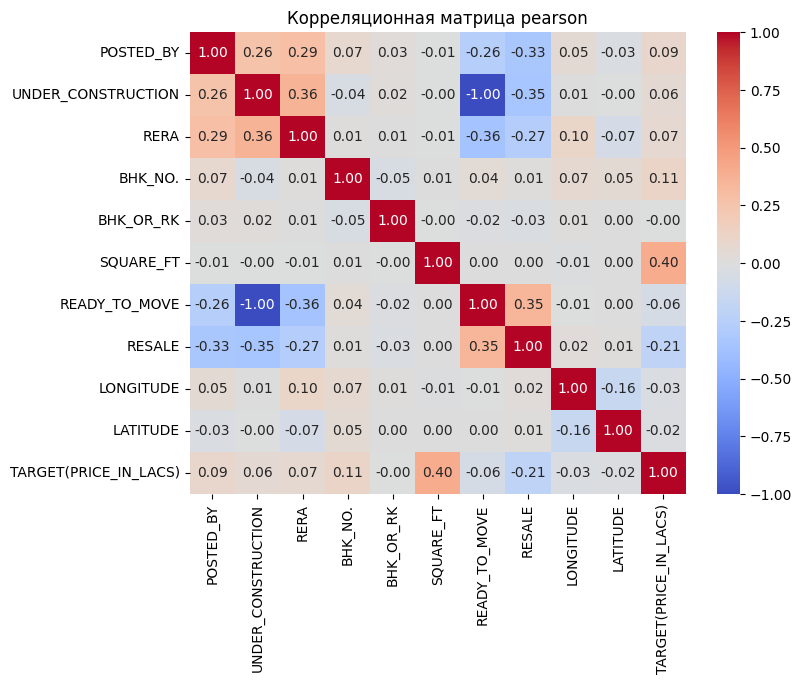

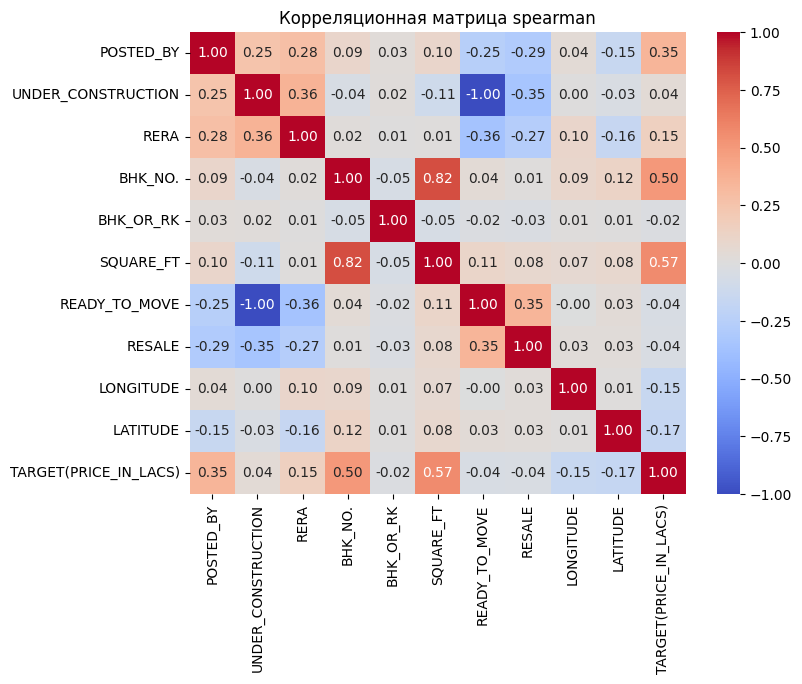

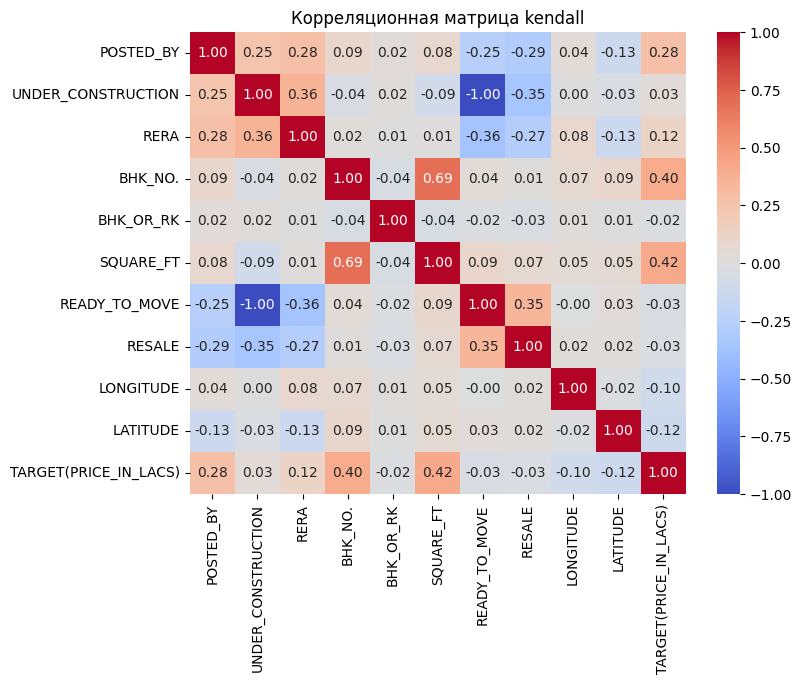

In [ ]:
dfcop = df.copy()
dfcop.loc[:, ['POSTED_BY', 'BHK_OR_RK']] = categorical.loc[:, ['POSTED_BY', 'BHK_OR_RK']]
dfcop = dfcop.drop(columns=['ADDRESS'])
pearson_corr = dfcop.corr(method='pearson')
spearman_corr = dfcop.corr(method='spearman')
kendall_corr = dfcop.corr(method='kendall')


def show(name):
    method = dfcop.corr(method=name)
    plt.figure(figsize=(8, 6))
    sns.heatmap(method, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f'Корреляционная матрица {name}')
    plt.show()
show('pearson')
show('spearman')
show("kendall")


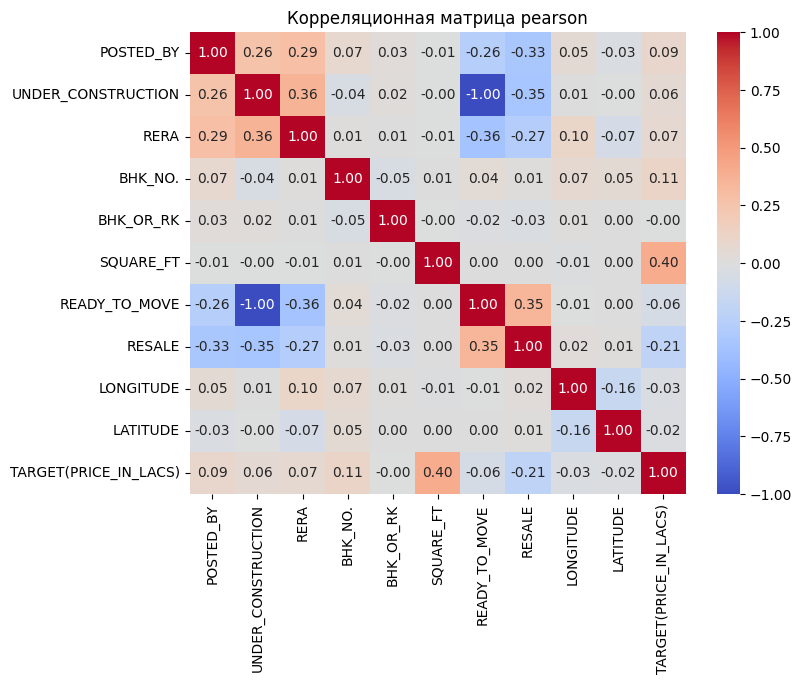

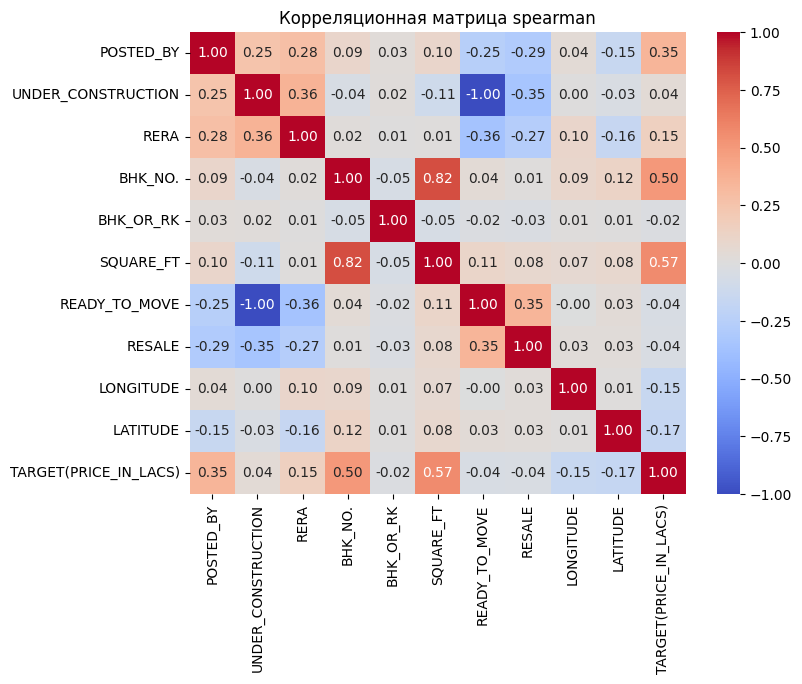

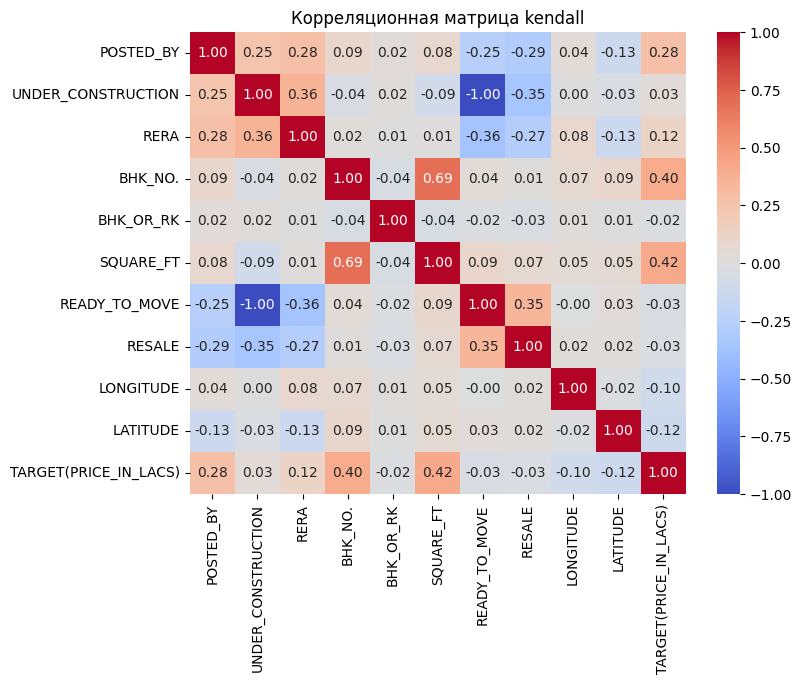

Pearson correlation matrix:

                       POSTED_BY  UNDER_CONSTRUCTION      RERA   BHK_NO.  BHK_OR_RK  SQUARE_FT  READY_TO_MOVE    RESALE  LONGITUDE  LATITUDE  TARGET(PRICE_IN_LACS)
POSTED_BY               1.000000            0.263473  0.285316  0.072466   0.027895  -0.005415      -0.263473 -0.332280   0.049164 -0.025425               0.093328
UNDER_CONSTRUCTION      0.263473            1.000000  0.363826 -0.040712   0.020719  -0.004204      -1.000000 -0.347405   0.006440 -0.000381               0.055399
RERA                    0.285316            0.363826  1.000000  0.009547   0.006056  -0.006229      -0.363826 -0.270351   0.104976 -0.065106               0.067636
BHK_NO.                 0.072466           -0.040712  0.009547  1.000000  -0.045231   0.005303       0.040712  0.014581   0.068730  0.046930               0.112283
BHK_OR_RK               0.027895            0.020719  0.006056 -0.045231   1.000000  -0.000292      -0.020719 -0.029346   0.009095  0.000303           

In [ ]:

dfcop = df.copy()
dfcop.loc[:, ['POSTED_BY', 'BHK_OR_RK']] = categorical.loc[:, ['POSTED_BY', 'BHK_OR_RK']]
dfcop = dfcop.drop(columns=['ADDRESS'])
pearson_corr = dfcop.corr(method='pearson')
spearman_corr = dfcop.corr(method='spearman')
kendall_corr = dfcop.corr(method='kendall')


def show(name):
    method = dfcop.corr(method=name)
    plt.figure(figsize=(8, 6))
    sns.heatmap(method, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f'Корреляционная матрица {name}')
    plt.show()

# выводим все корреляционные матрицы
for method_name in ['pearson', 'spearman', 'kendall']:
    show(method_name)

# выводим значения корреляционных матриц
print("Pearson correlation matrix:\n")
print(pearson_corr.to_string(), "\n")

print("Spearman correlation matrix:\n")
print(spearman_corr.to_string(), "\n")

print("Kendall correlation matrix:\n")
print(kendall_corr.to_string(), "\n")


#3. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

##1. Хи-квадрат (Chi-Square Test)

    Хи-квадрат тест используется для проверки гипотезы о том, что две категориальные переменные независимы (тест независимости)
     
    или что данные соответствуют ожидаемому распределению (тест соответствия).

In [ ]:

observed_counts = df['POSTED_BY'].value_counts().values
expected_counts = np.array([len(df) / len(observed_counts)] * len(observed_counts))

# Нормализуем expected_counts
expected_counts = expected_counts / sum(expected_counts) * sum(observed_counts)

chi2, p = chisquare(observed_counts, f_exp=expected_counts)
print("Тест соответствия распределения:")
print(f"Хи-квадрат: {chi2:.4f}, p-значение: {p:.4f}")
if p < 0.05:
    print("H₀ отклоняется: Распределение наблюдаемых данных статистически отличается от ожидаемого")
else:
    print("H₀ принимается: Распределение наблюдаемых данных не отличается от ожидаемого")

# 2. Хи-квадрат тест независимости
contingency_table = pd.crosstab(df['POSTED_BY'], df['BHK_OR_RK'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nТест независимости:")
print(f"Хи-квадрат: {chi2:.4f}, p-значение: {p:.4f}, Степени свободы: {dof}")
if p < 0.05:
    print("H₀ отклоняется: Есть зависимость между переменными ")
else:
    print("H₀ принимается: Переменные независимы ")


Тест соответствия распределения:
Хи-квадрат: 15980.0898, p-значение: 0.0000
H₀ отклоняется: Распределение наблюдаемых данных статистически отличается от ожидаемого

Тест независимости:
Хи-квадрат: 47.2135, p-значение: 0.0000, Степени свободы: 2
H₀ отклоняется: Есть зависимость между переменными 


##2. Точный тест *Фишера*

    Точный тест Фишера используется для проверки гипотезы о независимости двух категориальных переменных.

    Используется для таблиц 2x2

In [ ]:
table = pd.DataFrame({
        "есть заболевание" :[50, 30],
         "нет заболевания" :[100, 200]
}, index = ["Курит",   "Не курит"])

odds_ratio, p_value = fisher_exact(table)
print(f"Отношение шансов: {odds_ratio:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отклоняем H₀: есть связь между курением и заболеванием")
else:
    print("Принимаем H₀: нету связи между курением и заболеванием")
table

Отношение шансов: 3.3333
p-значение: 0.0000
Отклоняем H₀: есть связь между курением и заболеванием


,есть заболевание,нет заболевания
Курит,50,100
Не курит,30,200


##3. Тест МакНемара

In [ ]:
fig = pd.DataFrame({
    "После диеты: Сладкое (Да)": [40, 10],
      "После диеты: Сладкое (Нет)":  [15, 35],
}, index = ["До диеты: Сладкое (Да)", "До диеты: Сладкое (Нет)"])
table = np.array([[40, 15],
                  [10, 35]])
result = mcnemar(table, exact=True)
print("Результаты теста МакНемара:")
print(f"p-значение: {result.pvalue:.4f}")

if result.pvalue < 0.05:
    print("Отклоняем H₀: есть значимые изменения между до и после диеты.")
else:
    print("Принимаем H₀: нет значимых изменений между до и после диеты.")
fig

Результаты теста МакНемара:
p-значение: 0.4244
Принимаем H₀: нет значимых изменений между до и после диеты.


,После диеты: Сладкое (Да),После диеты: Сладкое (Нет)
До диеты: Сладкое (Да),40,15
До диеты: Сладкое (Нет),10,35


##4. Тест Кохрана-Мантеля-Хензеля

    Тест Кохрана-Мантеля-Хензеля используется для анализа связи между двумя категориальными переменными
    с учетом влияния третьей переменной, называемой стратификационной переменной (или блокирующей).

    Этот тест позволяет учитывать стратифицированные данные (например, данные,
    разделенные на группы по возрасту,
    полу или региону), чтобы проверить, сохраняется ли связь между переменными в каждой группе.



In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, chi2

np.random.seed(0)
data_cm = pd.DataFrame({
    'Treatment': np.random.choice(['Yes', 'No'], 100, replace=True),
    'Outcome1': np.random.choice(['Yes', 'No'], 100, replace=True),
    'Outcome2': np.random.choice(['Yes', 'No'], 100, replace=True)
})

def create_contingency_table(data):
    outcome1_table = pd.crosstab(data['Treatment'], data['Outcome1']).values
    outcome2_table = pd.crosstab(data['Treatment'], data['Outcome2']).values
    return np.array([outcome1_table, outcome2_table])

data = create_contingency_table(data_cm)

def cochran_mantel_haenszel(data):
    if len(data.shape) != 3 or data.shape[1] != 2 or data.shape[2] != 2:
        raise ValueError("Входные данные должны быть трехмерными с размерностью (k, 2, 2)")

    chi2_stats = []
    for i in range(data.shape[0]):
        contingency_table = data[i]
        chi2_stat, p, _, _ = chi2_contingency(contingency_table, correction=False)
        chi2_stats.append(chi2_stat)

    cmh_statistic = sum(chi2_stats)
    df = 1
    p_value = chi2.sf(cmh_statistic, df)
    return cmh_statistic, p_value

cmh_stat, p_value = cochran_mantel_haenszel(data)

print(f"Хи-квадрат: {cmh_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Нулевая гипотеза отклоняется: есть связь между приёмом лекарства и выздоровлением\n")
else:
    print("Нулевая гипотеза принимается: нет связи между приёмом лекарства и выздоровлением\n")


Хи-квадрат: 0.3433
p-значение: 0.5579
Нулевая гипотеза принимается: нет связи между приёмом лекарства и выздоровлением



#4. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

##Корреляционная матрица

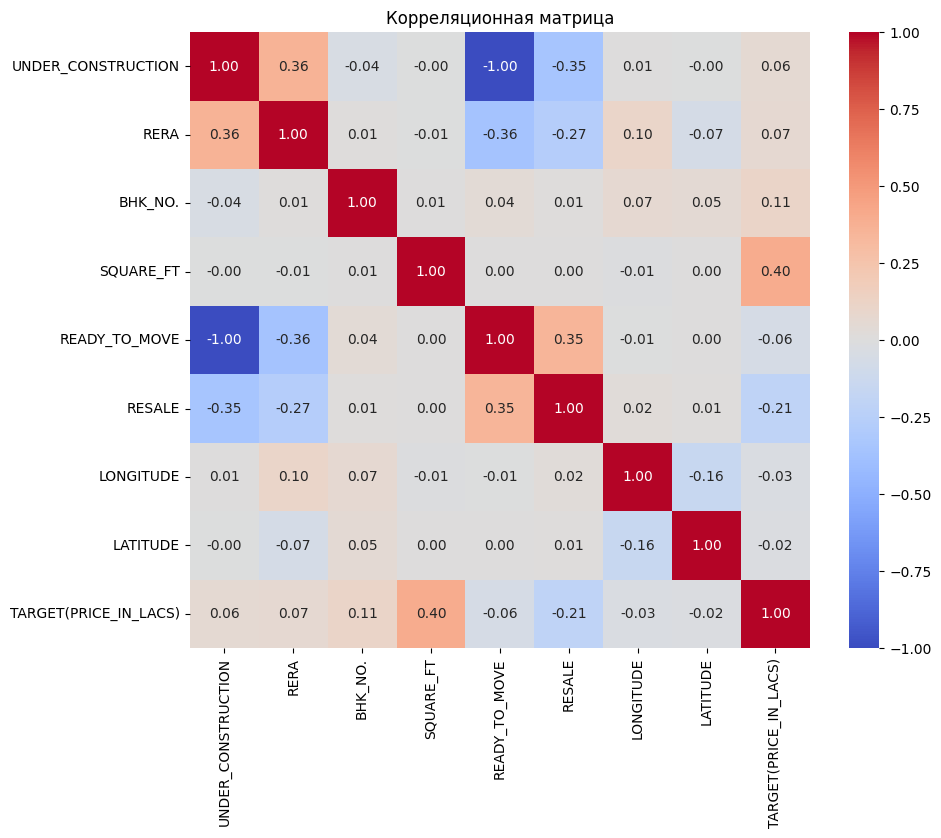

In [ ]:
correlation_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Корреляционная матрица")
plt.show()

##Фактор инфляции дисперсии (VIF)

    измеряет степень мультиколлинеарности между независимыми переменными в регрессионной модели.

##В данных отуствует мультиколлинеарность

In [ ]:
df_cleaned = df.select_dtypes(include=["number"]).drop(columns=["UNDER_CONSTRUCTION"])
df_cleaned = df_cleaned.fillna(df_cleaned.median())
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

X = add_constant(df_cleaned)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable        VIF
0                  const  97.162640
1                   RERA   1.205333
2                BHK_NO.   1.027627
3              SQUARE_FT   1.207540
4          READY_TO_MOVE   1.252927
5                 RESALE   1.227897
6              LONGITUDE   1.045156
7               LATITUDE   1.032126
8  TARGET(PRICE_IN_LACS)   1.282391


#5. Исследовать зависимости в данных с помощью дисперсионного анализа(ANOVA)
    используется для того, чтобы определить, существуют ли статистически значимые различия между средними значениями более чем двух групп
    
    Нулевая гипотеза (𝐻0): Средние значения числовой переменной одинаковы для всех групп категориальной переменной
    ***

In [ ]:
categorical_var = 'BHK_NO.'
numerical_var = 'SQUARE_FT'

groups = [group[numerical_var].values for name, group in df.groupby(categorical_var)]
f_statistic, p_value = f_oneway(*groups)

print(f"F-статистика: {f_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Нулевая гипотеза отклоняется: Средние значения отличаются.")
else:
    print("Нулевая гипотеза принимается: Средние значения не отличаются.")


F-статистика: 0.1917
p-значение: 0.9997
Нулевая гипотеза принимается: Средние значения не отличаются.


<ipython-input-11-1d438fb70d68>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[numerical_var].values for name, group in df.groupby(categorical_var)]


#6. Подогнать регрессионные модели (в том числе, нелинейные) к данным, а также оценить качество подобной аппроксимации.

In [ ]:
cat = df.select_dtypes(exclude=["number"]).columns
num = df.select_dtypes(include=["number"]).columns
d_train = df.dropna(subset=cat)
cat_encoded = pd.get_dummies(d_train[cat], drop_first=True)

d_train[num] = d_train[num].fillna(d_train[num].median())
d_train = pd.concat([d_train[num], cat_encoded], axis=1)
X = d_train.drop(columns=["TARGET(PRICE_IN_LACS)"])
y = d_train["TARGET(PRICE_IN_LACS)"]
model = LinearRegression()
model.fit(X, y)

<ipython-input-324-5ec71cd4912c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LinearRegression()

In [ ]:
y_pred = model.predict(X)
print(f"R^2: {model.score(X, y):.4f}")

R^2: 0.3740


In [ ]:
# X = X.drop(columns=["UNDER_CONSTRUCTION"])

In [ ]:
cat = df.select_dtypes(exclude=["number"]).columns
num = df.select_dtypes(include=["number"]).columns
d_train = df.dropna(subset=cat)
cat_encoded = pd.get_dummies(d_train[cat], drop_first=True)

d_train[num] = d_train[num].fillna(d_train[num].median())
d_train = pd.concat([d_train[num], cat_encoded], axis=1)
X = d_train.drop(columns=["TARGET(PRICE_IN_LACS)"])
y = d_train["TARGET(PRICE_IN_LACS)"]

In [ ]:
X = X.loc[:, ["SQUARE_FT", "LONGITUDE", "LATITUDE"]]
c = 1
for i in range(c):
    X[f'{i}'] = X.iloc[:, i] ** 2

In [ ]:
X

,SQUARE_FT,LONGITUDE,LATITUDE,0
0,1300.236407,12.969910,77.597960,1.690615e+06
1,1275.000000,12.274538,76.644605,1.625625e+06
2,933.159722,12.778033,77.632191,8.707871e+05
3,929.921143,28.642300,77.344500,8.647533e+05
4,999.009247,22.592200,88.484911,9.980195e+05
...,...,...,...,...
29446,2500.000000,27.140626,78.043277,6.250000e+06
29447,769.230769,39.945409,-86.150721,5.917160e+05
29448,1022.641509,26.928785,75.828002,1.045796e+06
29449,927.079009,12.900150,80.227910,8.594755e+05


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R² (коэффициент детерминации): {r2:.4f}')

R² (коэффициент детерминации): 0.1359


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² (коэффициент детерминации): {r2:.4f}')

Mean Squared Error (MSE): 147000.5945
R² (коэффициент детерминации): 0.7302


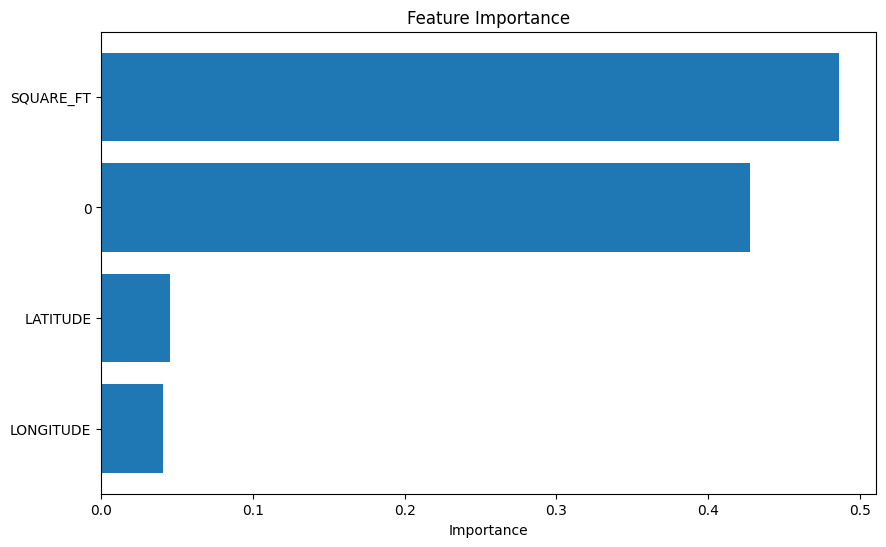

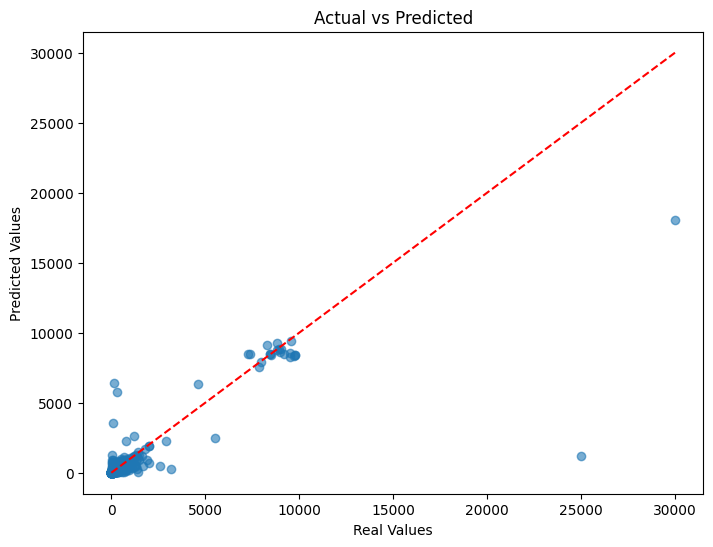

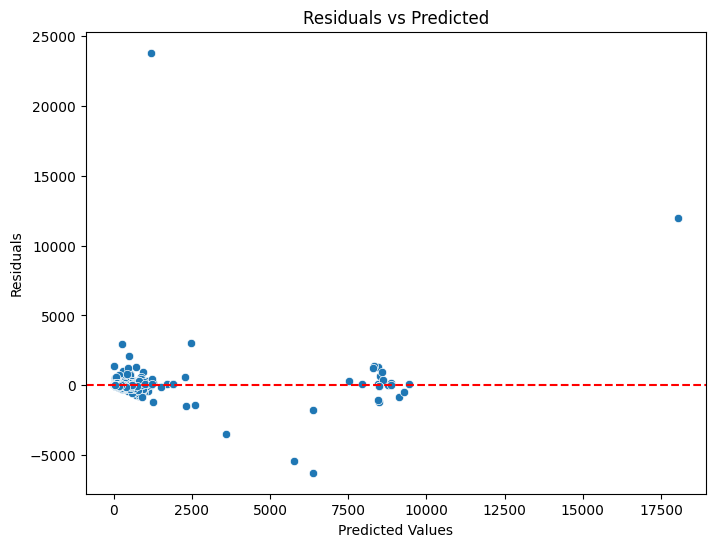

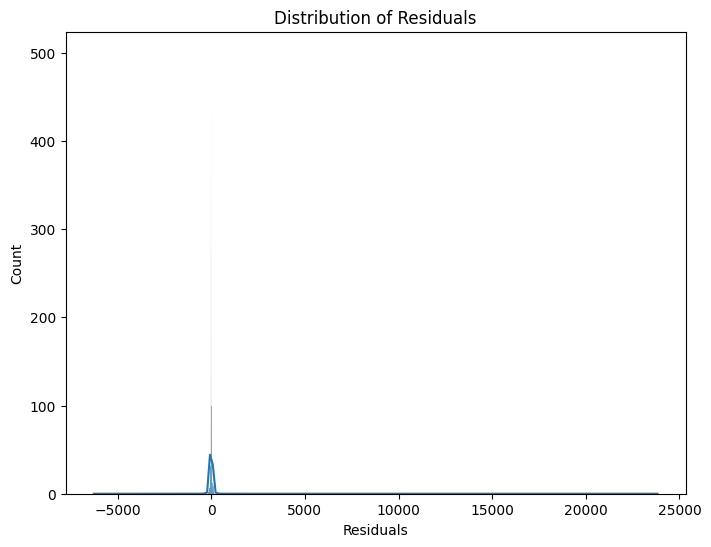

Mean Squared Error (MSE): 147000.5945
R² (коэффициент детерминации): 0.7302


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# График важности признаков
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# График фактических vs предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

# График распределения остатков
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Вывод значений метрик
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² (коэффициент детерминации): {r2:.4f}')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df_clean_all['ActualElapsedTime']
Y = df_clean_all['DepDelay']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)